In [1]:
import pandas as pd

f = pd.read_csv('sales_data.csv')
df = pd.DataFrame(f)
df

,Products,Transaction Date,Currency,Total,Cur Total
0,DATA ANALYSIS MADE EASY,7/27/2023,GBP,8.51,6808.000000
1,DATA ANALYSIS MADE EASY,7/26/2023,NGN,5500.00,5500.000000
2,DATA ANALYSIS MADE EASY,7/25/2023,RWF,8397.92,3496.054096
3,DATA ANALYSIS MADE EASY,7/25/2023,NGN,5500.00,5500.000000
4,DATA ANALYSIS MADE EASY,7/22/2023,USD,15.00,10500.000000
...,...,...,...,...,...
434,DATA ANALYSIS MADE EASY,4/2/2023,NGN,5500.00,5500.000000
435,12 Strategies,3/29/2023,NGN,6500.00,6500.000000
436,12 Strategies,3/29/2023,NGN,6500.00,6500.000000
437,12 Strategies,3/29/2023,NGN,6500.00,6500.000000


In [2]:
import pandas as pd

f = pd.read_csv('sales_data.csv')
df = pd.DataFrame(f)

new_data = df[['Products','Cur Total']]
new_data

,Products,Cur Total
0,DATA ANALYSIS MADE EASY,6808.000000
1,DATA ANALYSIS MADE EASY,5500.000000
2,DATA ANALYSIS MADE EASY,3496.054096
3,DATA ANALYSIS MADE EASY,5500.000000
4,DATA ANALYSIS MADE EASY,10500.000000
...,...,...
434,DATA ANALYSIS MADE EASY,5500.000000
435,12 Strategies,6500.000000
436,12 Strategies,6500.000000
437,12 Strategies,6500.000000


In [3]:
df.head()

,Products,Transaction Date,Currency,Total,Cur Total
0,DATA ANALYSIS MADE EASY,7/27/2023,GBP,8.51,6808.000000
1,DATA ANALYSIS MADE EASY,7/26/2023,NGN,5500.00,5500.000000
2,DATA ANALYSIS MADE EASY,7/25/2023,RWF,8397.92,3496.054096
3,DATA ANALYSIS MADE EASY,7/25/2023,NGN,5500.00,5500.000000
4,DATA ANALYSIS MADE EASY,7/22/2023,USD,15.00,10500.000000


In [4]:
df.tail()

,Products,Transaction Date,Currency,Total,Cur Total
434,DATA ANALYSIS MADE EASY,4/2/2023,NGN,5500.0,5500.0
435,12 Strategies,3/29/2023,NGN,6500.0,6500.0
436,12 Strategies,3/29/2023,NGN,6500.0,6500.0
437,12 Strategies,3/29/2023,NGN,6500.0,6500.0
438,12 Strategies,3/29/2023,NGN,6500.0,6500.0


In [5]:
df.shape

(439, 5)

In [6]:
df.isna().sum()

Products            0
Transaction Date    0
Currency            0
Total               0
Cur Total           0
dtype: int64

In [7]:
df.duplicated().sum()

221

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(new_data['Products'])
print("Order of appearences: ",le.classes_)
new_data['Products'] = le.transform(new_data['Products'])
new_data

Order of appearences:  [0 1 2]


C:\Users\Admin\AppData\Local\Temp/ipykernel_5804/2831812871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Products'] = le.transform(new_data['Products'])


,Products,Cur Total
0,1,6808.000000
1,1,5500.000000
2,1,3496.054096
3,1,5500.000000
4,1,10500.000000
...,...,...
434,1,5500.000000
435,0,6500.000000
436,0,6500.000000
437,0,6500.000000


           Products  Cur Total
Products   1.000000  -0.221484
Cur Total -0.221484   1.000000


<AxesSubplot:>

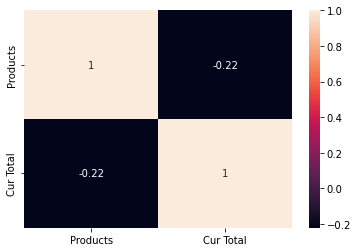

In [10]:
import seaborn as sns

print(new_data.corr())
sns.heatmap(new_data.corr(),xticklabels=new_data.corr().columns.values,yticklabels=new_data.corr().columns.values,annot=True)

In [14]:
new_data.describe()

,Products,Cur Total
count,439.000000,439.000000
mean,1.018223,6785.541650
std,0.223373,2505.943172
min,0.000000,1770.000000
25%,1.000000,5500.000000
50%,1.000000,5500.000000
75%,1.000000,9800.000000
max,2.000000,14700.000000


In [50]:
index = list(zip(new_data['Products'],new_data['Cur Total']))
index = pd.MultiIndex.from_tuples(index)
data = pd.DataFrame(new_data,index)
data.reset_index(inplace=True)
data.set_index('Products','Cur Total')
data.dropna(axis=1,inplace=True)
data

C:\Users\Admin\AppData\Local\Temp/ipykernel_5804/4120567383.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  data.set_index('Products','Cur Total')


,level_0,level_1
0,1,6808.000000
1,1,5500.000000
2,1,3496.054096
3,1,5500.000000
4,1,10500.000000
...,...,...
434,1,5500.000000
435,0,6500.000000
436,0,6500.000000
437,0,6500.000000


In [53]:
data2 = {
    'Products' : data['level_0'],
    'Cur Total' : data['level_1']
}
dff = pd.DataFrame(data2)
dff

,Products,Cur Total
0,1,6808.000000
1,1,5500.000000
2,1,3496.054096
3,1,5500.000000
4,1,10500.000000
...,...,...
434,1,5500.000000
435,0,6500.000000
436,0,6500.000000
437,0,6500.000000


In [90]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(dff['Cur Total'],dff['Products'],test_size=0.2,random_state=50)
y_test

98     1
293    2
29     1
222    1
421    1
      ..
25     1
170    1
63     1
311    1
234    1
Name: Products, Length: 88, dtype: int64

In [84]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred = dt.predict(np.array(x_test).reshape(-1,1))
y_pred

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
acc

0.9772727272727273

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.98      0.99        83
           2       0.67      1.00      0.80         4

    accuracy                           0.98        88
   macro avg       0.89      0.99      0.93        88
weighted avg       0.98      0.98      0.98        88

